# <center>Circuit Topology script V1.0</center>

<center>Duane Moes - For suggestions and further questions: moesduane@gmail.com </center>

---
This is a fully automated script that mainly utilizes biopython to perform circuit topology analysis on a given set of proteins. When possible, try to use the mmCIF file system instead of the PDB file option, this is because PDB is outdated and more prone to missing atoms etc.

#### Packages used
<ul><li>BioPython</li>
<li>SciPy </li>
<li>NumPy</li>
<li>MatPlotlib</li>
<li>DSSP</li>
</ul>

### User guide
<ul>
    <li>Either copy your <code>.PDB</code> or <code>.CIF </code> files to their respective maps in <code>/input_files/</code>, or enter the 4 letter protein codes in <code>input_files/protlist.txt</code> and run the first code block.
</li>
</ul>
<i>NOTE that when using a large number of proteins (>50), it is more efficient to use the batch download function from the </i>

__[RCSB Db](https://www.rcsb.org/downloads)__
  
        
      


In [1]:
from functions.plots import circuit_plot,matrix_plot,stats_plot
from functions.calculating import get_cmap,get_matrix,get_stats, energy_cmap, string_pdb
from functions.importing import retrieve_chain,retrieve_cif
import numpy as np 
import os
import matplotlib
%matplotlib inline

<ul><li>Enter the file type you're using, if you want to downoad the files you entered in <code>input_files/protlist.txt</code>, indicate it here. </li></ul>

In [2]:
fileformat = input('cif or pdb? (cif/pdb) \n')
if fileformat == 'cif':
    dlinput = input('Do you want to fetch CIF\'s from Database? protlist.txt (y/n) \n')
    if dlinput:  
        efiltering = input('apply energy filtering? (y/n)\n')
        if efiltering == 'y':
            potsign = input('positive or negative filtering? (+/-)')
            if potsign == '+':
                potential_sign = 1
            else:
                potential_sign = 0
else:
    efiltering  = input('apply energy filtering? (y/n)\n')
    dlinput = 'n'

#Enter a list with protein names that need to be downloaded (pdblist.txt)
if dlinput == 'y':  
    retrieve_cif.retrieve_cif()

cif or pdb? (cif/pdb) 
cif
Do you want to fetch CIF's from Database? protlist.txt (y/n) 
n
apply energy filtering? (y/n)
n


***Variable input***<br>
When <code>plot_figures = 1</code>, figures will also be saved in <code>results/</code>.


In [3]:
cutoff_distance =       3.6
cutoff_numcontacts =    3
length_filtering =      0
exclude_neighbour =     4
plot_figures =          0

***cmap***    - Atom-Atom contact map (<i>cutoff_distance</i>)<br>
***cmap2***  - Res-Res contact map<br>
***cmap3***  - Boolean Res-Res contact map (<i>cutoff_numcontacts</i>)<br>
***cmap4***  - Boolean Res-Res contact map with indicated secondary structures filtered out <br>
***cmap5***  - Boolean Secondary Structure - Secondary Structure contact map<br>


1a5v.cif


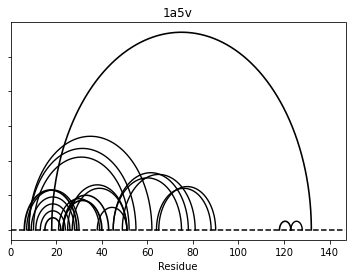

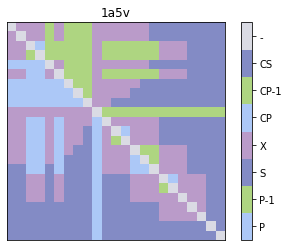

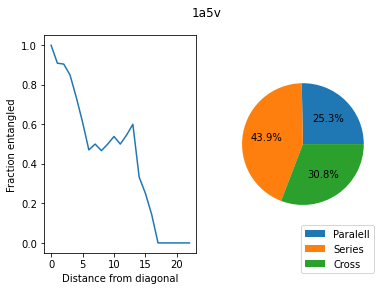

In [5]:
number_of_files = len(os.listdir('input_files/' +fileformat))

for num,files in enumerate(os.listdir('input_files/' +fileformat)):
    
    try:
        chain,file_path = retrieve_chain.retrieve_chain(files)
        print(f'{files}')
    except:
        continue

    #Step 1 - Draw a segment-segment based contact map (if length_filtering > 0, it is activated, input is the max distance)
    cmap3, cmap2, protid ,numbering, res_names, = get_cmap.get_cmap(chain, cutoff_distance, cutoff_numcontacts, length_filtering, exclude_neighbour)

    #Step 1.5 - Energy filtering
    if efiltering == 'y':
        cmap3 = energy_cmap.energy_cmap(cmap3,numbering,res_names,potential_sign)
        protid = protid + '_(' + potsign + ')ef'
    
    #Step 2 - Draw a circuit topology relations matrixo
    mat, c = get_matrix.get_matrix(cmap3,protid)
    
    

    #Step 3 - Circuit topology statistics
    psc, entangled = get_stats.get_stats(mat,protid)
    #psclist.append([protid,psc])
    
    
    #Plots
    sitelist = circuit_plot.circuit_plot(cmap2,protid,numbering,cutoff_numcontacts)
    matrix_plot.matrix_plot(mat,protid)
    stats_plot.stats_plot(entangled,psc,protid)